In [1]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
import numpy as np
tqdm.pandas()

# Load the data

In [2]:
movies_df = data = pd.read_csv('./movies.dat', delimiter='::', header=None, names=['ID', 'Title', 'Genres'], encoding='latin1')
users_df = data = pd.read_csv('./users.dat', delimiter='::', header=None, names=['ID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], encoding='latin1')
ratings_df = data = pd.read_csv('./ratings.dat', delimiter='::', header=None, names=['UserId', 'MovieId', 'Rating', 'Timestamp' ], encoding='latin1')

C:\Users\romar\AppData\Local\Temp\ipykernel_18108\464341593.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = data = pd.read_csv('./movies.dat', delimiter='::', header=None, names=['ID', 'Title', 'Genres'], encoding='latin1')
C:\Users\romar\AppData\Local\Temp\ipykernel_18108\464341593.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = data = pd.read_csv('./users.dat', delimiter='::', header=None, names=['ID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], encoding='latin1')
C:\Users\romar\AppData\Local\Temp\ipykernel_18108\464341593.py:3: ParserWarning: Falling back to the 'python

In [3]:
movies_df.head()

,ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
users_df.head()

,ID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings_df.head()

,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# Merge Data

In [6]:
user_ratings_df = pd.merge(users_df, ratings_df, left_on=['ID'], right_on=['UserId'], how='inner')
user_ratings_df.drop(columns=['ID'], inplace=True)
movie_user_rating_df = pd.merge(user_ratings_df, movies_df, left_on=['MovieId'], right_on=['ID'], how='inner')
#movie_user_rating_df.drop(columns=['ID','UserId', 'MovieId'], inplace=True)
movie_user_rating_df.drop(columns=['ID'], inplace=True)

In [7]:
movie_user_rating_df.head()

,Gender,Age,Occupation,Zip-Code,UserId,MovieId,Rating,Timestamp,Title,Genres
0,F,1,10,48067,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,M,56,16,70072,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,M,25,12,32793,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,M,25,7,22903,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,M,50,1,95350,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


Text(0.5, 1.0, 'Distribution of timestamps')

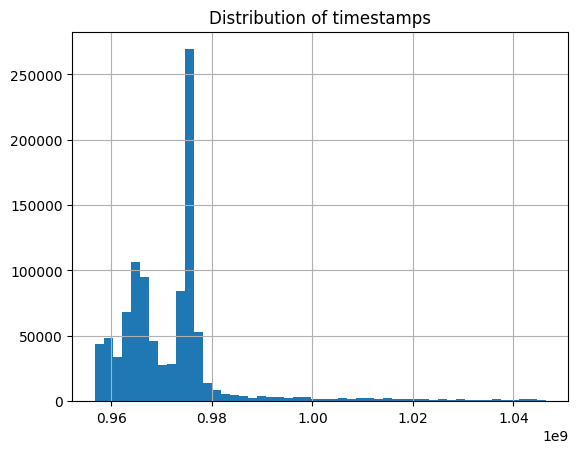

In [8]:
movie_user_rating_df.Timestamp.hist(bins=50)
plt.title("Distribution of timestamps")

In [9]:
movie_user_rating_df[movie_user_rating_df.Timestamp > 0.9757*1e9].shape[0]/movie_user_rating_df.shape[0]

0.20479819717679004

# Split Data

In [10]:
y = movie_user_rating_df['Rating']
X = movie_user_rating_df.drop(columns=['Rating'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,Gender,Age,Occupation,Zip-Code,UserId,MovieId,Timestamp,Title,Genres
416292,M,18,6,19104,1112,3916,974942836,Remember the Titans (2000),Drama
683230,M,25,14,92104,2796,1591,997321489,Spawn (1997),Action|Adventure|Sci-Fi|Thriller
2434,M,25,20,95380,1680,914,974713988,My Fair Lady (1964),Musical|Romance
688533,F,25,0,53589,5418,2991,960183537,Live and Let Die (1973),Action
472584,M,35,0,97225,4220,2174,965370901,Beetlejuice (1988),Comedy|Fantasy
...,...,...,...,...,...,...,...,...,...
259178,M,1,0,11803,1509,2716,974747653,Ghostbusters (1984),Comedy|Horror
365838,M,18,12,53188,3756,1411,966096744,Hamlet (1996),Drama
131932,F,25,17,48239,3609,1552,966614629,Con Air (1997),Action|Adventure|Thriller
671155,M,50,0,66048,4169,3639,971579005,"Man with the Golden Gun, The (1974)",Action


# Process Genres

In [13]:
def split_genres(genres):
    return genres.split('|')

# Apply split_genres function to both train and test data
X["Genres"] = X["Genres"].apply(split_genres)
X_train['Genres'] = X_train['Genres'].apply(split_genres)
X_test['Genres'] = X_test['Genres'].apply(split_genres)

In [14]:
X_train.head()

,Gender,Age,Occupation,Zip-Code,UserId,MovieId,Timestamp,Title,Genres
416292,M,18,6,19104,1112,3916,974942836,Remember the Titans (2000),[Drama]
683230,M,25,14,92104,2796,1591,997321489,Spawn (1997),"[Action, Adventure, Sci-Fi, Thriller]"
2434,M,25,20,95380,1680,914,974713988,My Fair Lady (1964),"[Musical, Romance]"
688533,F,25,0,53589,5418,2991,960183537,Live and Let Die (1973),[Action]
472584,M,35,0,97225,4220,2174,965370901,Beetlejuice (1988),"[Comedy, Fantasy]"


# Combined CF Representation:

In [19]:
combined_train_dataset = pd.concat([X_train, y_train], axis=1)

In [20]:
combined_train_dataset.head()

,Gender,Age,Occupation,Zip-Code,UserId,MovieId,Timestamp,Title,Genres,Rating
416292,M,18,6,19104,1112,3916,974942836,Remember the Titans (2000),[Drama],5
683230,M,25,14,92104,2796,1591,997321489,Spawn (1997),"[Action, Adventure, Sci-Fi, Thriller]",1
2434,M,25,20,95380,1680,914,974713988,My Fair Lady (1964),"[Musical, Romance]",3
688533,F,25,0,53589,5418,2991,960183537,Live and Let Die (1973),[Action],4
472584,M,35,0,97225,4220,2174,965370901,Beetlejuice (1988),"[Comedy, Fantasy]",4


In [21]:
combined_train_dataset.drop(columns=['Zip-Code'], inplace=True)

In [22]:
def encode_users(users_df):
  # Exploding 'Genres' to make each genre a separate row
  df_gender = pd.get_dummies(users_df['Gender'], prefix='Gender').astype(int)
  df_occupation = pd.get_dummies(users_df['Occupation'], prefix='Occupation').astype(int)

  df_age = pd.get_dummies(users_df['Age'], prefix='Age').astype(int)
  #df_movies = pd.get_dummies(users_df['Title'], prefix='Movie').astype(int)

  # Concatenate the one-hot encoded columns with the original DataFrame
  df_encoded = pd.concat([users_df.drop(columns=['Gender', 'Age', 'Occupation'], axis=1), df_gender, df_age, df_occupation], axis=1)

  return df_encoded.drop_duplicates("UserId").reset_index()

In [23]:
encoded_users = encode_users(combined_train_dataset)
encoded_users.shape

(6040, 37)

In [24]:
encoded_users.head()

,index,UserId,MovieId,Timestamp,Title,Genres,Rating,Gender_F,Gender_M,Age_1,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,416292,1112,3916,974942836,Remember the Titans (2000),[Drama],5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,683230,2796,1591,997321489,Spawn (1997),"[Action, Adventure, Sci-Fi, Thriller]",1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2434,1680,914,974713988,My Fair Lady (1964),"[Musical, Romance]",3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,688533,5418,2991,960183537,Live and Let Die (1973),[Action],4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,472584,4220,2174,965370901,Beetlejuice (1988),"[Comedy, Fantasy]",4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Spot-checking:

In [25]:
combined_train_dataset.iloc[0]

Gender                                 M
Age                                   18
Occupation                             6
UserId                              1112
MovieId                             3916
Timestamp                      974942836
Title         Remember the Titans (2000)
Genres                           [Drama]
Rating                                 5
Name: 416292, dtype: object

In [26]:
encoded_users.head()

,index,UserId,MovieId,Timestamp,Title,Genres,Rating,Gender_F,Gender_M,Age_1,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,416292,1112,3916,974942836,Remember the Titans (2000),[Drama],5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,683230,2796,1591,997321489,Spawn (1997),"[Action, Adventure, Sci-Fi, Thriller]",1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2434,1680,914,974713988,My Fair Lady (1964),"[Musical, Romance]",3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,688533,5418,2991,960183537,Live and Let Die (1973),[Action],4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,472584,4220,2174,965370901,Beetlejuice (1988),"[Comedy, Fantasy]",4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
temp = combined_train_dataset.pivot(index='UserId', columns='MovieId', values='Rating')
temp.fillna(temp.mean(), inplace=True)

In [29]:
cf_matrix_train = encoded_users.merge(temp, left_on="UserId", right_on=temp.index)

In [30]:
cf_matrix_train.head()

,index,UserId,MovieId,Timestamp,Title,Genres,Rating,Gender_F,Gender_M,Age_1,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,416292,1112,3916,974942836,Remember the Titans (2000),[Drama],5,0,1,0,...,4.000000,2.166667,1.394737,2.27381,3.545455,3.00000,4.137931,3.545455,3.774194,3.808442
1,683230,2796,1591,997321489,Spawn (1997),"[Action, Adventure, Sci-Fi, Thriller]",1,0,1,0,...,2.888889,2.166667,1.394737,2.27381,3.545455,3.60951,4.137931,3.545455,3.774194,3.808442
2,2434,1680,914,974713988,My Fair Lady (1964),"[Musical, Romance]",3,0,1,0,...,2.888889,2.166667,1.394737,4.00000,3.545455,4.00000,4.137931,3.545455,3.774194,3.808442
3,688533,5418,2991,960183537,Live and Let Die (1973),[Action],4,1,0,0,...,2.888889,2.166667,1.394737,2.27381,3.545455,3.60951,4.137931,3.545455,3.774194,3.808442
4,472584,4220,2174,965370901,Beetlejuice (1988),"[Comedy, Fantasy]",4,0,1,0,...,2.888889,2.166667,1.394737,2.27381,3.545455,3.60951,4.137931,3.545455,3.774194,3.808442


In [31]:
cf_matrix_train.shape

(6040, 3720)

### Spot Checking

In [32]:
cf_matrix_train[cf_matrix_train.UserId==1112][[col for col in cf_matrix_train.columns if str(col).startswith("391") or str(col).startswith("394")]]

,391,394,3910,3911,3912,3913,3914,3915,3916,3917,...,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949
0,3.393939,3.8,3.740741,3.0,2.434783,2.913043,3.320755,5.0,5.0,3.135747,...,1.583333,2.166667,1.826087,4.0,2.166667,1.394737,2.27381,3.545455,3.0,4.137931


In [33]:
combined_train_dataset[(combined_train_dataset.UserId==1112)&(combined_train_dataset.MovieId>3900)]

,Gender,Age,Occupation,UserId,MovieId,Timestamp,Title,Genres,Rating
416292,M,18,6,1112,3916,974942836,Remember the Titans (2000),[Drama],5
683716,M,18,6,1112,3911,974942836,Best in Show (2000),[Comedy],3
395112,M,18,6,1112,3948,974942811,Meet the Parents (2000),[Comedy],3
650444,M,18,6,1112,3927,974945714,Fantastic Voyage (1966),"[Adventure, Sci-Fi]",4
805501,M,18,6,1112,3943,974942811,Bamboozled (2000),[Comedy],4
944439,M,18,6,1112,3915,974946108,Girlfight (2000),[Drama],5


In [34]:
def process_movies(movies_df):
  # Exploding 'Genres' to make each genre a separate row
  df_exploded = movies_df.explode('Genres')

  # One-hot encoding
  one_hot = pd.get_dummies(df_exploded['Genres'], prefix='Genre')

  # Adding back the title to the one-hot encoded DataFrame
  one_hot['Title'] = df_exploded['Title']

  # Group by 'Title' and sum to combine the one-hot encoded genres for each movie
  df_one_hot = one_hot.groupby('Title').sum().reset_index()

  return df_one_hot


In [35]:
temp = movies_df
temp["Genres"] = temp["Genres"].apply(split_genres)
movies_with_onehot_genres = process_movies(temp)
movies_with_onehot_genres.head()

,Title,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,"$1,000,000 Duck (1971)",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,'Night Mother (1986),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,'Til There Was You (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,"'burbs, The (1989)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,...And Justice for All (1979),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [36]:
movies_with_onehot_genres.shape, movies_df.shape

((3883, 19), (3883, 3))

In [37]:
movies_with_onehot_genres

,Title,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,"$1,000,000 Duck (1971)",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,'Night Mother (1986),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,'Til There Was You (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,"'burbs, The (1989)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,...And Justice for All (1979),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,Zero Effect (1998),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3879,Zero Kelvin (Kjærlighetens kjøtere) (1995),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3880,Zeus and Roxanne (1997),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3881,Zone 39 (1997),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
combined_train_dataset.shape

(800167, 9)

In [39]:
combined_train_dataset = combined_train_dataset.merge(movies_with_onehot_genres, how="left", on="Title")

In [40]:
user_genre_preference = combined_train_dataset.groupby("UserId")[[col for col in combined_train_dataset.columns if col.startswith("Genre_")]].sum()

In [41]:
user_genre_preference.head()

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
UserId,,,,,,,,,,,,,,,,,,
1,4,4,15,18,14,2,0,19,2,0,0,13,0,6,2,3,1,0
2,47,17,0,0,20,8,0,61,1,0,1,0,3,17,14,22,12,3
3,17,20,3,3,22,0,0,7,1,0,3,1,1,3,5,5,2,3
4,15,6,0,0,0,1,0,2,1,0,3,0,0,2,7,2,3,2
5,24,7,2,5,43,13,5,81,0,3,9,3,7,24,14,28,6,1


In [42]:
cf_matrix_train = cf_matrix_train.merge(user_genre_preference, left_on="UserId", right_on=user_genre_preference.index)
cf_matrix_train.drop(columns=["index", "MovieId", "Timestamp", "Title", "Genres", "Rating"], inplace=True)

In [43]:
cf_matrix_train.head()

,UserId,Gender_F,Gender_M,Age_1,Age_18,Age_25,Age_35,Age_45,Age_50,Age_56,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1112,0,1,0,1,0,0,0,0,0,...,25,6,66,27,22,66,76,117,23,4
1,2796,0,1,0,0,1,0,0,0,0,...,11,4,39,27,8,65,84,68,23,7
2,1680,0,1,0,0,1,0,0,0,0,...,44,14,208,54,61,176,152,255,45,18
3,5418,1,0,0,0,1,0,0,0,0,...,10,6,13,25,7,34,38,27,19,7
4,4220,0,1,0,0,0,1,0,0,0,...,6,3,7,7,6,39,14,12,4,2


In [44]:
cf_matrix_train.shape

(6040, 3732)

Save CF-Matrix as file so that Google Colab can load it directly.

In [45]:
#cf_matrix_train.to_pickle("cf_matrix_train.pkl")

# Autoencoder

In [170]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.utils.data import DataLoader, TensorDataset


class AE(nn.Module):
    def __init__(self, input_columns):
        super(AE, self).__init__()
        self.fc1 = nn.Linear(input_columns, 1200)
        self.fc2 = nn.Linear(1200, 400)  # Encoded representation
        self.fc3 = nn.Linear(400, 100)
        self.fc4 = nn.Linear(100, 400)
        self.fc5 = nn.Linear(400, 1200)
        self.fc6 = nn.Linear(1200, input_columns)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

    def encode(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return x

    def decode(self, x):
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.fc6(x)
        return x

## Training

### Split Train CF matrix to train-val

In [196]:
cf_matrix_train_train, cf_matrix_train_val = train_test_split(cf_matrix_train, test_size=0.8, random_state=42)

In [197]:
cf_matrix_train_train.drop(columns=["UserId"], inplace=True)
cf_matrix_train_val.drop(columns=["UserId"], inplace=True)

In [198]:
ae = AE(input_columns=cf_matrix_train_train.shape[1])
user_criterion = nn.MSELoss()
user_optimizer = optim.Adam(ae.parameters(), lr=0.0001)
# encoded_representation = ae.encode(your_input_tensor_here)

train_users_encoded_tensor = torch.tensor(cf_matrix_train_train.values, dtype=torch.float32)
dataset = TensorDataset(train_users_encoded_tensor, train_users_encoded_tensor) # input and target are the same for autoencoders
dataloader = DataLoader(dataset, batch_size=64, shuffle=True) # Adjust batch_size as needed

validation_users_encoded_tensor = torch.tensor(cf_matrix_train_val.values, dtype=torch.float32)
validation_dataset = TensorDataset(validation_users_encoded_tensor, validation_users_encoded_tensor) # input and target are the same for autoencoders
validation_dataloader = DataLoader(validation_dataset, batch_size=64, shuffle=True) # Adjust batch_size as needed


## User Encoding

Epoch [1/1000], Training Loss: 10.8745, Validation Loss: 5.7441
Epoch [2/1000], Training Loss: 4.1237, Validation Loss: 4.5454
Epoch [3/1000], Training Loss: 3.3234, Validation Loss: 3.8097
Epoch [4/1000], Training Loss: 2.8324, Validation Loss: 3.3173
Epoch [5/1000], Training Loss: 2.6490, Validation Loss: 3.2141
Epoch [6/1000], Training Loss: 2.5268, Validation Loss: 3.0260
Epoch [7/1000], Training Loss: 2.4021, Validation Loss: 2.7430
Epoch [8/1000], Training Loss: 1.9719, Validation Loss: 1.8408
Epoch [9/1000], Training Loss: 1.0981, Validation Loss: 0.9319
Epoch [10/1000], Training Loss: 0.7816, Validation Loss: 0.8772
Epoch [11/1000], Training Loss: 0.7388, Validation Loss: 0.8336
Epoch [12/1000], Training Loss: 0.7203, Validation Loss: 0.8181
Epoch [13/1000], Training Loss: 0.7140, Validation Loss: 0.8125
Epoch [14/1000], Training Loss: 0.7099, Validation Loss: 0.8109
Epoch [15/1000], Training Loss: 0.7081, Validation Loss: 0.8024
Epoch [16/1000], Training Loss: 0.7062, Validati

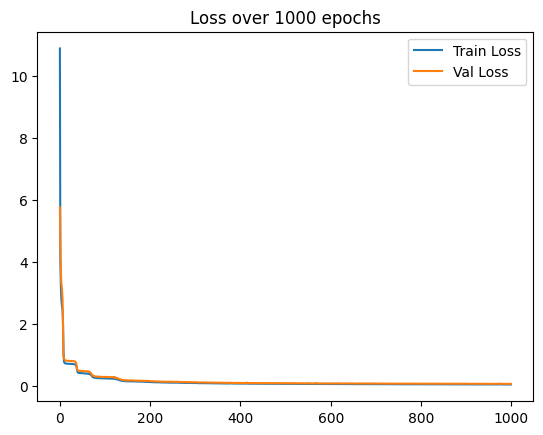

In [199]:
nb_epochs = 1000  # Number of epochs
device = torch.device("cuda")
train_losses = []
val_losses = []
ae.to(device)
for epoch in range(1, nb_epochs + 1):
    train_loss = 0.0  # To accumulate losses for reporting
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)  # If using GPU

        # Zero the parameter gradients
        user_optimizer.zero_grad()

        # Forward pass
        outputs = ae(inputs)

        # Compute the loss
        loss = user_criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        user_optimizer.step()

        train_loss += loss.item()

    # Compute average loss for the epoch
    avg_train_loss = train_loss / len(dataloader)
    train_losses.append(avg_train_loss)

    ae.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No gradient computation in this block
        val_loss = 0.0
        for inputs, targets in validation_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = ae(inputs)
            loss = user_criterion(outputs, targets)

            val_loss += loss.item()

    avg_val_loss = val_loss / len(validation_dataloader)
    val_losses.append(avg_val_loss)

    print(f'Epoch [{epoch}/{nb_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')
plt.plot(train_losses, label = "Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title(f"Loss over {nb_epochs} epochs")
plt.legend()
plt.show()


## Save the trained model for future use

In [202]:
torch.save(ae.state_dict(), "./ae_state_dict.pth")


## Same plot with log scale:

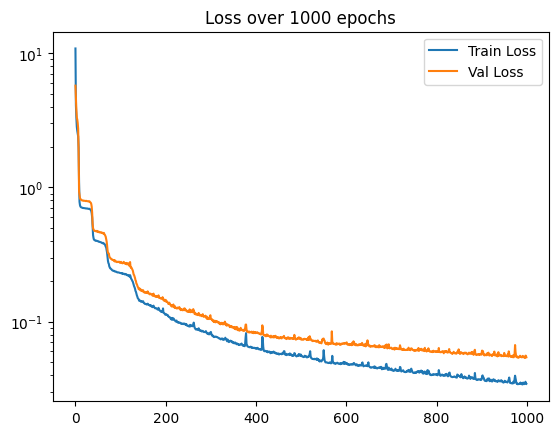

In [200]:
plt.yscale("log")
plt.plot(train_losses, label = "Train Loss")
plt.plot(val_losses, label="Val Loss")

plt.title(f"Loss over {nb_epochs} epochs")
plt.legend()
plt.show()

# Get closest user from autoencoded representations:

In [309]:
autoencoded_representation_train = ae.encode(torch.tensor(cf_matrix_train.drop(columns=["UserId"]).values, dtype=torch.float32).to(device))

In [310]:
cf_matrix_train.drop(columns=["UserId"]).shape, autoencoded_representation_train.shape

((6040, 3731), torch.Size([6040, 100]))

In [311]:
autoencoded_representation_train_np = autoencoded_representation_train.detach().cpu().numpy()

In [312]:
autoencoded_representation_train_np.shape

(6040, 100)

In [325]:
from sklearn.neighbors import NearestNeighbors

# Initialize the NearestNeighbors model
k = 100  # Number of neighbors you want to find
nn = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(autoencoded_representation_train_np)
distances, indices = nn.kneighbors(autoencoded_representation_train_np)

In [326]:
k_distances = distances[:, 1:]  # All rows, columns from 1 to end
k_indices = indices[:, 1:]  # All rows, columns from 1 to end

In [329]:
with open('k_distances.pkl', 'wb') as f:
  pkl.dump(k_distances, f)
with open('k_indices.pkl', 'wb') as f:
  pkl.dump(k_indices, f)

In [327]:
indices

array([[   0,  245, 1769, ..., 1376,  794,  200],
       [   1, 1700,  327, ..., 2084, 2123, 1122],
       [   2,  699,  618, ..., 1174,  129,   50],
       ...,
       [6037, 3634, 5355, ..., 4045, 5120, 3744],
       [6038, 5018, 5014, ..., 5799, 3452, 5886],
       [6039, 5411, 3051, ..., 4210, 6019, 1529]])

In [328]:
k_indices

array([[ 245, 1769,  356, ..., 1376,  794,  200],
       [1700,  327, 1212, ..., 2084, 2123, 1122],
       [ 699,  618,   46, ..., 1174,  129,   50],
       ...,
       [3634, 5355, 5064, ..., 4045, 5120, 3744],
       [5018, 5014, 4975, ..., 5799, 3452, 5886],
       [5411, 3051, 4328, ..., 4210, 6019, 1529]])

In [317]:
X_test.head()

,Gender,Age,Occupation,Zip-Code,UserId,MovieId,Timestamp,Title,Genres
895536,F,35,2,78744,5755,184,958280246,Nadja (1994),[Drama]
899739,M,35,7,30324,4585,519,964321944,Robocop 3 (1993),"[Sci-Fi, Thriller]"
55687,M,25,12,92688,1503,3114,974762175,Toy Story 2 (1999),"[Animation, Children's, Comedy]"
63727,M,1,10,99203,2166,648,974614593,Mission: Impossible (1996),"[Action, Adventure, Mystery]"
822011,M,45,7,35216,3201,2178,968626301,Frenzy (1972),[Thriller]


In [320]:
X_train

,Gender,Age,Occupation,Zip-Code,UserId,MovieId,Timestamp,Title,Genres
416292,M,18,6,19104,1112,3916,974942836,Remember the Titans (2000),[Drama]
683230,M,25,14,92104,2796,1591,997321489,Spawn (1997),"[Action, Adventure, Sci-Fi, Thriller]"
2434,M,25,20,95380,1680,914,974713988,My Fair Lady (1964),"[Musical, Romance]"
688533,F,25,0,53589,5418,2991,960183537,Live and Let Die (1973),[Action]
472584,M,35,0,97225,4220,2174,965370901,Beetlejuice (1988),"[Comedy, Fantasy]"
...,...,...,...,...,...,...,...,...,...
259178,M,1,0,11803,1509,2716,974747653,Ghostbusters (1984),"[Comedy, Horror]"
365838,M,18,12,53188,3756,1411,966096744,Hamlet (1996),[Drama]
131932,F,25,17,48239,3609,1552,966614629,Con Air (1997),"[Action, Adventure, Thriller]"
671155,M,50,0,66048,4169,3639,971579005,"Man with the Golden Gun, The (1974)",[Action]


## This cell loads nearest neighbours to perform calculations locally instead of on Colab, due to usage limitations:

In [46]:
import pickle as pkl
with open('k_indices.pkl', 'rb') as pickle_file:
    k_indices = pkl.load(pickle_file)

with open('k_distances.pkl', 'rb') as pickle_file:
    k_distances = pkl.load(pickle_file)

In [47]:
print(k_indices)
print(k_indices.shape)

[[ 245 1769  356 ...  985 1373  667]
 [1700  327 1212 ... 1413 1485 1777]
 [ 699  618   46 ...  846   49  796]
 ...
 [3634 5355 5064 ... 5657 5297 5312]
 [5018 5014 4975 ... 5648 5528 5577]
 [5411 3051 4328 ... 4159 1993 5321]]
(6040, 100)


In [100]:
print(k_indices)
print(k_indices.shape)

[[ 245 1769  356 ... 1376  794  200]
 [1700  327 1212 ... 2084 2123 1122]
 [ 699  618   46 ... 1174  129   50]
 ...
 [3634 5355 5064 ... 4045 5120 3744]
 [5018 5014 4975 ... 5799 3452 5886]
 [5411 3051 4328 ... 4210 6019 1529]]
(6040, 10)


### Spot Checks

In [48]:
k_indices[1,:10]

array([1700,  327, 1212,  942, 1914, 2534, 2131, 2084, 2123, 1122],
      dtype=int64)

In [49]:
common_movies = set(X_train[X_train.UserId==2].Title).intersection(set(X_train[X_train.UserId==1701].Title))

In [50]:
combined_train_dataset[(combined_train_dataset.UserId==2)&(combined_train_dataset.Title.isin(common_movies))][["Title","Rating"]]

,Title,Rating
21908,"Few Good Men, A (1992)",5
27036,Double Jeopardy (1999),3
29568,Rocky (1976),5
33279,Star Wars: Episode V - The Empire Strikes Back...,5
34100,Braveheart (1995),5
49157,"Lost World: Jurassic Park, The (1997)",4
51970,"Breakfast Club, The (1985)",2
84164,"Shawshank Redemption, The (1994)",5
93762,On the Waterfront (1954),5
98673,Guess Who's Coming to Dinner (1967),4


In [51]:
combined_train_dataset[(combined_train_dataset.UserId==1701)&(combined_train_dataset.Title.isin(common_movies))][["Title","Rating"]]

,Title,Rating
629,October Sky (1999),4
1115,"Few Good Men, A (1992)",4
16669,Braveheart (1995),5
54485,"Lost World: Jurassic Park, The (1997)",2
61076,"Hunt for Red October, The (1990)",4
78720,Like Water for Chocolate (Como agua para choco...,3
89731,Gladiator (2000),4
121243,On Golden Pond (1981),4
137654,"Mask of Zorro, The (1998)",4
139975,Gone with the Wind (1939),4


In [52]:
set(X_train[X_train.UserId==1].Title)

{'Airplane! (1980)',
 'Aladdin (1992)',
 'Apollo 13 (1995)',
 'Awakenings (1990)',
 'Back to the Future (1985)',
 'Bambi (1942)',
 'Beauty and the Beast (1991)',
 'Ben-Hur (1959)',
 'Big (1988)',
 "Bug's Life, A (1998)",
 'Christmas Story, A (1983)',
 'Cinderella (1950)',
 'Close Shave, A (1995)',
 'Dead Poets Society (1989)',
 'Driving Miss Daisy (1989)',
 'Dumbo (1941)',
 'E.T. the Extra-Terrestrial (1982)',
 'Erin Brockovich (2000)',
 'Fargo (1996)',
 "Ferris Bueller's Day Off (1986)",
 'Gigi (1958)',
 'Girl, Interrupted (1999)',
 'Hercules (1997)',
 'Hunchback of Notre Dame, The (1996)',
 'James and the Giant Peach (1996)',
 'Last Days of Disco, The (1998)',
 'Mary Poppins (1964)',
 'Meet Joe Black (1998)',
 'Miracle on 34th Street (1947)',
 'Mulan (1998)',
 'My Fair Lady (1964)',
 'Pleasantville (1998)',
 'Pocahontas (1995)',
 'Ponette (1996)',
 'Princess Bride, The (1987)',
 'Rain Man (1988)',
 'Run Lola Run (Lola rennt) (1998)',
 'Saving Private Ryan (1998)',
 'Secret Garden, Th

In [53]:
user_movie_summary = combined_train_dataset.pivot(index='UserId', columns='MovieId', values='Rating')

In [54]:
user_movie_summary

MovieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserId,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Try to determine a proper k value using a sample of 1000 
Otherwise this would be too time-consuming if the entire dataset was used.

Ignore this first method as it just uses the mean value if no user in the k nearest neighbours has rated the movie. It is just left here as reference.

In [193]:
from sklearn.metrics import mean_squared_error

for k in [1,3,5,10,15,30,60, 100]:
    predicted_ratings = []
    key_errors = 0
    for i, row in tqdm(X_test.head(1000).iterrows()):
      k_nearest_neighbours = k_indices[row["UserId"]-1,:k]
      user_mean_rating = combined_train_dataset[combined_train_dataset.UserId==row["UserId"]]["Rating"].mean() # Start with mean rating of the user
      neighbours_who_rated = 0
      #rating = 0
      weight_sum = 0
      weight_denominator = 0  
      for i, neighbour in enumerate(k_nearest_neighbours):
        #print("User = " + str(row["UserId"]) + "Neibhour: " + str(neighbour))
        neighbour_rating = combined_train_dataset[(combined_train_dataset.UserId==neighbour+1)&(combined_train_dataset.MovieId==row["MovieId"])].Rating
        if not neighbour_rating.empty:
          neighbours_who_rated += 1
          weight_sum += (k_distances[row["UserId"]-1, i] * (neighbour_rating.iloc[0] - combined_train_dataset[combined_train_dataset.UserId==neighbour+1]["Rating"].mean()))
          weight_denominator += k_distances[row["UserId"]-1, i]
          #rating += neighbour_rating.iloc[0]
      if neighbours_who_rated != 0:
        rating = user_mean_rating + (weight_sum/weight_denominator)
        predicted_ratings.append(rating)
      else:
        try:
          predicted_ratings.append(cf_matrix_train[row["MovieId"]].mean())
        except KeyError:
          print("Movie not found in train set. Assigning default value of 4.")
          predicted_ratings.append(4)
          key_errors += 1
    mse = mean_squared_error(y_test.head(1000).values, np.array(predicted_ratings))
    rmse = np.sqrt(mse)

    print(f'For k={k}, RMSE: {rmse}')

1000it [00:02, 342.41it/s]


For k=1, RMSE: 1.0328998364428956


1000it [00:06, 154.10it/s]


For k=3, RMSE: 1.0915636348430995


1000it [00:09, 106.67it/s]


For k=5, RMSE: 1.133162840376505


1000it [00:15, 63.48it/s]


For k=10, RMSE: 1.1366969235789497


1000it [00:23, 42.52it/s]


For k=15, RMSE: 1.1306095322658805


1000it [00:48, 20.47it/s]


For k=30, RMSE: 1.1106454169122308


1000it [01:33, 10.68it/s]


For k=60, RMSE: 1.0813828653601794


1000it [02:39,  6.26it/s]

For k=100, RMSE: 1.0694439834147353


In [195]:
from sklearn.metrics import mean_squared_error

for k in [1,3,5,10,15,30,60, 100]:
    predicted_ratings = []
    key_errors = 0
    for i, row in tqdm(X_test.head(1000).iterrows()):
      k_nearest_neighbours = k_indices[row["UserId"]-1]
      user_mean_rating = combined_train_dataset[combined_train_dataset.UserId==row["UserId"]]["Rating"].mean() # Start with mean rating of the user
      neighbours_who_rated = 0
      #rating = 0
      weight_sum = 0
      weight_denominator = 0  
      for i, neighbour in enumerate(k_nearest_neighbours):
        if neighbours_who_rated==k:
            break
        #print("User = " + str(row["UserId"]) + "Neibhour: " + str(neighbour))
        neighbour_rating = combined_train_dataset[(combined_train_dataset.UserId==neighbour+1)&(combined_train_dataset.MovieId==row["MovieId"])].Rating
        if not neighbour_rating.empty:
          neighbours_who_rated += 1
          weight_sum += (k_distances[row["UserId"]-1, i] * (neighbour_rating.iloc[0] - combined_train_dataset[combined_train_dataset.UserId==neighbour+1]["Rating"].mean()))
          weight_denominator += k_distances[row["UserId"]-1, i]
          #rating += neighbour_rating.iloc[0]
      if neighbours_who_rated != 0:
        rating = user_mean_rating + (weight_sum/weight_denominator)
        predicted_ratings.append(rating)
      else:
        try:
          predicted_ratings.append(cf_matrix_train[row["MovieId"]].mean())
        except KeyError:
          print("Movie not found in train set. Assigning default value of 4.")
          predicted_ratings.append(4)
          key_errors += 1
    mse = mean_squared_error(y_test.head(1000).values, np.array(predicted_ratings))
    rmse = np.sqrt(mse)

    print(f'For k={k}, RMSE: {rmse}')

1000it [00:30, 32.38it/s]


For k=1, RMSE: 1.2768600301620672


1000it [01:06, 15.14it/s]


For k=3, RMSE: 1.12969563842719


1000it [01:31, 10.91it/s]


For k=5, RMSE: 1.0940093091286942


1000it [02:08,  7.78it/s]


For k=10, RMSE: 1.0829276979151956


1000it [02:22,  7.02it/s]


For k=15, RMSE: 1.0770757816343726


1000it [02:34,  6.49it/s]


For k=30, RMSE: 1.0698173858092952


1000it [02:37,  6.37it/s]


For k=60, RMSE: 1.0694439834147353


1000it [02:40,  6.25it/s]

For k=100, RMSE: 1.0694439834147353


## Picking K=30 to get final prediction RMSE:

In [57]:
from sklearn.metrics import mean_squared_error

for k in [30]:
    predicted_ratings = []
    key_errors = 0
    for i, row in tqdm(X_test.iterrows()):
      k_nearest_neighbours = k_indices[row["UserId"]-1]
      user_mean_rating = combined_train_dataset[combined_train_dataset.UserId==row["UserId"]]["Rating"].mean() # Start with mean rating of the user
      neighbours_who_rated = 0
      #rating = 0
      weight_sum = 0
      weight_denominator = 0  
      for i, neighbour in enumerate(k_nearest_neighbours):
        if neighbours_who_rated==k:
            break
        #print("User = " + str(row["UserId"]) + "Neibhour: " + str(neighbour))
        neighbour_rating = combined_train_dataset[(combined_train_dataset.UserId==neighbour+1)&(combined_train_dataset.MovieId==row["MovieId"])].Rating
        if not neighbour_rating.empty:
          neighbours_who_rated += 1
          weight_sum += (k_distances[row["UserId"]-1, i] * (neighbour_rating.iloc[0] - combined_train_dataset[combined_train_dataset.UserId==neighbour+1]["Rating"].mean()))
          weight_denominator += k_distances[row["UserId"]-1, i]
          #rating += neighbour_rating.iloc[0]
      if neighbours_who_rated != 0:
        rating = user_mean_rating + (weight_sum/weight_denominator)
        predicted_ratings.append(rating)
      else:
        try:
          predicted_ratings.append(cf_matrix_train[row["MovieId"]].mean())
        except KeyError:
          print("Movie not found in train set. Assigning default value of 4.")
          predicted_ratings.append(4)
          key_errors += 1
    mse = mean_squared_error(y_test.values, np.array(predicted_ratings))
    rmse = np.sqrt(mse)

    print(f'For k={k}, RMSE: {rmse}')

3705it [18:20,  2.94it/s]

Movie not found in train set. Assigning default value of 4.


5635it [27:27,  3.37it/s]

Movie not found in train set. Assigning default value of 4.


14612it [1:09:52,  3.61it/s]

Movie not found in train set. Assigning default value of 4.


14731it [1:10:24,  3.53it/s]

Movie not found in train set. Assigning default value of 4.


29960it [2:23:33,  3.12it/s]

Movie not found in train set. Assigning default value of 4.


36691it [2:57:26,  3.37it/s]

Movie not found in train set. Assigning default value of 4.


41280it [3:19:32,  3.56it/s]

Movie not found in train set. Assigning default value of 4.


42626it [3:26:03,  3.77it/s]

Movie not found in train set. Assigning default value of 4.


48727it [3:54:08,  3.48it/s]

Movie not found in train set. Assigning default value of 4.


64212it [5:08:32,  3.55it/s]

Movie not found in train set. Assigning default value of 4.


72534it [5:49:08,  3.38it/s]

Movie not found in train set. Assigning default value of 4.


72636it [5:49:39,  3.25it/s]

Movie not found in train set. Assigning default value of 4.


74656it [5:59:50,  3.31it/s]

Movie not found in train set. Assigning default value of 4.


86917it [7:01:43,  3.31it/s]

Movie not found in train set. Assigning default value of 4.


90331it [7:19:00,  3.34it/s]

Movie not found in train set. Assigning default value of 4.


95369it [7:44:25,  3.26it/s]

Movie not found in train set. Assigning default value of 4.


95883it [7:47:01,  3.20it/s]

Movie not found in train set. Assigning default value of 4.


114657it [9:07:54,  5.73it/s]

Movie not found in train set. Assigning default value of 4.


115622it [9:10:43,  5.88it/s]

Movie not found in train set. Assigning default value of 4.


126026it [9:41:14,  5.97it/s]

Movie not found in train set. Assigning default value of 4.


126074it [9:41:23,  5.83it/s]

Movie not found in train set. Assigning default value of 4.


131016it [10:01:17,  3.96it/s]

Movie not found in train set. Assigning default value of 4.


138930it [10:30:26,  5.67it/s]

Movie not found in train set. Assigning default value of 4.


140771it [10:35:35,  6.01it/s]

Movie not found in train set. Assigning default value of 4.


162495it [11:41:30,  5.63it/s]

Movie not found in train set. Assigning default value of 4.


185537it [12:57:19,  4.42it/s]

Movie not found in train set. Assigning default value of 4.


185629it [12:57:39,  4.75it/s]

Movie not found in train set. Assigning default value of 4.


190417it [13:12:50,  5.40it/s]

Movie not found in train set. Assigning default value of 4.


198420it [13:37:02,  5.66it/s]

Movie not found in train set. Assigning default value of 4.


200042it [13:42:05,  4.06it/s]

For k=30, RMSE: 1.02117224461362


## Evaluating:

In [58]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.values, np.array(predicted_ratings))
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 1.02117224461362
